In [1]:
from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.utility.plot import plot_converge_order
from NSPLIB.src.instances.illustrative_examples.fig12 import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
import numpy as np
from pyomo.opt import SolverFactory
import copy
sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()

from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.utility.plot import plot_converge_order

alg = LagrangeanAlgo(m,lag_iter=2, solver='baron')
ca = HausdorffAnalyzer(alg)

eps_min = -3
eps_max = -3
steps = 1

tol = 1e-30
y_val={'y': 2.6199679213876177}
eps_list, distances= ca.analyze(y=y_val.copy(), y_optimal=True,v=-0.14585646148681208, eps_min=eps_min, eps_max=eps_max, steps=steps, tol=tol)
eps_list, distances

ModuleNotFoundError: No module named 'NSPLIB.src.instances.illustrative_examples.fig12'

# perturb theoretical result

# perturb result

In [1]:
eps_list=[1e0,1e-1,1e-2,1e-3]
distances0=[0.5731149303499309,
  0.005708947014479104,
  5.7087231101982105e-05,
  5.708720881569818e-07]
distances1=[0.5795059518233501,
  0.006242522461977096,
  0.00011782358507606006,
  1.0205490996173516e-05]
distances01=[0.5737530156646123,
  0.005761530683543348,
  6.2389278007835e-05,
  1.1780141908612762e-06]
distances10=[0.6380362397013358,
  0.011814616103693387,
  0.0010205288028479753,
  0.0001040466988571076]

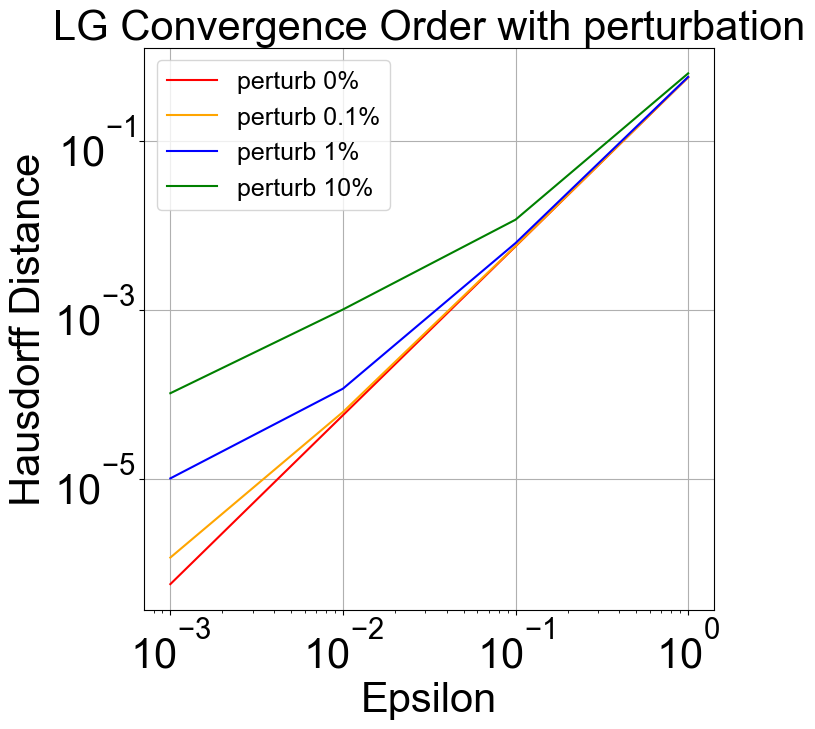

In [2]:
import matplotlib.pyplot as plt

plt.style.use(['./src/utility/' + i + '.mplstyle' for i in ['font-sans', 'size-8-8', 'fontsize']])

plt.loglog(eps_list, distances0,color="red",label="perturb 0%")
plt.loglog(eps_list, distances01,color="orange",label="perturb 0.1%")
plt.loglog(eps_list, distances1,color="blue",label="perturb 1%")
plt.loglog(eps_list, distances10,color="green",label="perturb 10%")
plt.legend()
plt.title('LG Convergence Order with perturbation')
plt.xlabel('Epsilon')
plt.ylabel('Hausdorff Distance')
plt.grid()




# derive theoretical result


In [4]:
import numpy as np
from scipy.optimize import minimize_scalar
y_val=2.6199679213876177

def v_10(y):
    return 1.00694*y**3-4.74589*y**2+5.17523*y
def v_20(y):
    return -0.677232*y**3+3.03949*y**2-3.02338*y
def v0(y):
    return v_10(y) + v_20(y)
def v_lg_overall(yl, yu):

    def v_lg_10(y):
        return 1.00694*y**3-4.74589*y**2+5.17523*y

    def v_lg_20(y):
        return (v_20(yu) - v_20(yl)) / (yu - yl) * (y - yl) + v_20(yl)

    def v_lg0(y):
        return v_lg_10(y) + v_lg_20(y)
    def func(y):
        return 1.00694*y**3-4.74589*y**2+5.17523*y+(v_20(yu) - v_20(yl)) / (yu - yl) * (y - yl) + v_20(yl)

    result = minimize_scalar(func, bounds=(yl,yu), method='bounded')
    return v0(y_val) - v_lg0(result.x)
for i in np.logspace(0,-3,4):
    yl, yu = y_val - i / 2, y_val + i / 2
    print((v_20(yu) - v_20(yl)) / (yu - yl))

-1.2119879180342492
-1.0443729980342413
-1.0426968488340238
-1.0426800873398605


In [3]:
eps_list = np.logspace(0, -7, 8)
distances = []
for eps in eps_list:
    yl, yu = y_val - eps / 2, y_val + eps / 2
    distances.append(v_lg_overall(yl, yu))
    print(eps,distances[-1])

1.0 0.5731149303499309
0.1 0.005708947014479104
0.01 5.7087231101982105e-05
0.001 5.708720881569818e-07
0.0001 5.708718386898681e-09
1e-05 5.26625409946746e-11
1e-06 5.235811784132238e-13
1e-07 1.7763568394002505e-15


(array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07]),
 [0.5731149303499309,
  0.005708947014479104,
  5.7087231101982105e-05,
  5.708720881569818e-07,
  5.708718386898681e-09,
  5.26625409946746e-11,
  5.235811784132238e-13,
  1.7763568394002505e-15])

## value function visualization

Text(0, 0.5, 'Objective')

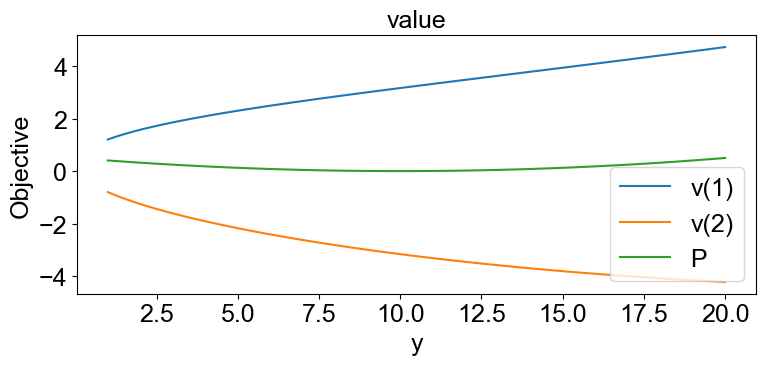

In [1]:
import numpy as np
y=np.linspace(1,20,100)
def evaluate_v1(y):
    return y**0.5+0.0025*(y-10)**2
def evaluate_v2(y):
    return -y**0.5+0.0025*(y-10)**2
import matplotlib.pyplot as plt
plt.style.use(['./src/utility/' + i + '.mplstyle' for i in ['font-sans', 'size-8-4', 'fontsize']])
plt.plot(y, evaluate_v1(y))
plt.plot(y, evaluate_v2(y))
plt.plot(y, evaluate_v1(y) + evaluate_v2(y))
plt.legend(['v(1)', 'v(2)',"P"])
plt.title('value')
plt.xlabel('y')
plt.ylabel('Objective')